# Lattices of normalized ideals of numerical semigroups

We start by loading the [numericalsgps](https://gap-packages.github.io/numericalsgps/) package, and with a procedure to check if a given set is the Apéry set of an ideal of a numerical semigroup (with respect to the multiplicity of the numerical semigroup).

In [2]:
LoadPackage("numericalsgps");

# detects if a given list is the apery list of an ideal of s
isaperylistideal:=function(ap,s)
    local aps, m;
    if not(IsListOfIntegersNS(ap)) then
        return false;
    fi;

    if not(ForAll(ap, x->x>=0)) then    
        return false;
    fi;
    m:=Multiplicity(s);
    if Length(ap)<>m then
        return false;
    fi;

    aps:=AperyList(s);
    return ForAll(Cartesian([1..m],[1..m]), i-> ap[i[1]]+aps[i[2]] >= ap[1+(i[1]+i[2]-2) mod m]);
end;;

true

With this, we can compute the set of all normalized ideals of a numerical semigroup $S$, which we denote by $\mathfrak{I}_0(S)$.

In [3]:
# computes the set of normalized ideals of s
I0:=function(s)
    local k, c, v, m;
    m:=Multiplicity(s);
    k:=Concatenation([0],KunzCoordinates(s));
    c:=Cartesian(List([1..m],i->[0..k[i]]));
    c:=Filtered(c, k->isaperylistideal(List([1..m],i->k[i]*m+i-1),s));
    v:=List(c, k->List([1..m],i->k[i]*m+i-1)+s);
    return v;
end;;

We want to focus on when the poser $(\mathfrak{I}_0(S),\preceq)$ is a lattice, with $I\preceq J$ if there exists $K$ such that $I+K=J$.

In [4]:
leadd:=function(i,j,ids)
    local cand;
    if not(IsSubset(j,i)) then
        return(false);
    fi;
    cand:=Filtered(ids,k->IsSubset(j,k));
    return ForAny(cand, k->j=i+k);
end;;

Computing the set of maximal and minimal elements of a set of ideals will be handy later.

In [6]:
# computes minimal elements of a set of ideals
minimals:=function(l,is)
    return Filtered(l,i->Filtered(l,j->leadd(j,i,is))=[i]);
end;;

#computes maximal elements of a set of ideals
maximals:=function(l,is)
    return Filtered(l,i->Filtered(l,j->leadd(i,j,is))=[i]);
end;;


In order to compute the join of two ideals, we will need the set of upper bounds of a set of ideals.

In [8]:
# upper bounds for a set of ideals li
upperbounds:=function(li,is)
    return Filtered(is,k->ForAll(li,i->leadd(i,k,is)));
end;;

# join for a set of ideals li
join:=function(li,is)
    local maxs,ub;
    ub:=upperbounds(li,is);
    maxs:=minimals(ub,is);
    if Length(maxs)<>1 then 
        return fail;
    fi;
    return maxs[1];
end;;

We can compute the ideals covering a given ideal in the following way.

In [14]:
s:=NumericalSemigroup(4,7,9,10);;
is:=I0(s);;
i:=[0,3]+s;;
cv:=minimals(Difference(upperbounds([i],is),[i]),is);;
List(cv,MinimalGenerators);

[ [ 0, 1, 3 ], [ 0, 3, 5 ], [ 0, 3, 6 ] ]

We proceed analogously for the meet of a set of ideals.

In [10]:
# lower bounds for a set of ideals li
lowerbounds:=function(li,is)
    return Filtered(is,k->ForAll(li,i->leadd(k,i,is)));
end;;

# meet for a set of ideals li
meet:=function(li,is)
    local mins,lb;
    lb:=lowerbounds(li,is);
    mins:=maximals(lb,is);
    if Length(mins)<>1 then 
        return fail;
    fi;
    return mins[1];
end;;

We now have all the ingredients to check if the set of normalized ideals of a numerical semigroup is a join semiattice

In [11]:
# checks if every two ideals has a suppremum
isjoinsemilatticei0:=function(s)
    local is,cis,ub, minimals,t;

    minimals:=function(l)
        return Filtered(l,i->Filtered(l,j->leadd(j,i,is))=[i]);
    end;

    is:=I0(s);
    cis:=IteratorOfCartesianProduct(is,is);
    for t in cis do
        ub:=Filtered(is,i->leadd(t[1],i,is) and leadd(t[2],i,is));
        if Length(minimals(ub))>1 then 
            Info(InfoNumSgps,2,"There is no supremum for ", MinimalGenerators(t[1]), " and ", MinimalGenerators(t[2]));
            return false;
        fi;
    od;
    return true;
end;;

It is well known that the join of two ideals does not have to be the union nor the sum of these ideals. We use $S=\langle 4,9\rangle$ to illustrate this. We start by proving that $(\mathfrak{I}_0(S),\preceq)$ is a join semilattice (this may take some time of computation; half a minute on an M3 macbook pro).

In [19]:
s:=NumericalSemigroup(4,9);;
isjoinsemilatticei0(s);

true

For $I=\{0,1,2\}+S$ and $J=\{0,1,6\}+S$, we get that the three ideals $I\vee J$, $I\cup J$ and $I+J$ are pairwise different.

In [25]:
is:=I0(s);;
i:=[0,1,2]+s;;
j:=[0,1,6]+s;;
MinimalGenerators(join([i,j],is));
MinimalGenerators(Union(i,j));
MinimalGenerators(i+j);

[ 0, 1, 2, 7 ]

[ 0, 1, 2 ]

[ 0, 1, 2, 3 ]

Next, we show that for $S=\langle 5,6,7,8,9\rangle$, the poset $(\mathfrak{I}_0(S),\preceq)$ is not a join semilattice. To see this, we show that $(\{0,1\}+S)\vee (\{0,1,3\}+S)$ does not exist.

In [33]:
s:=NumericalSemigroup(5,6,7,8,9);;
is:=I0(s);;
i:=[0,1]+s;;
j:=[0,1,3]+s;;
ub:=upperbounds([i,j],is);;
List(ub,MinimalGenerators);
List(minimals(ub,is),MinimalGenerators);
join([i,j],is);

[ [ 0, 1, 2, 3, 4 ], [ 0, 1, 2, 3 ], [ 0, 1, 3, 4 ] ]

[ [ 0, 1, 2, 3 ], [ 0, 1, 3, 4 ] ]

fail

In [12]:
ismeetemilatticei0:=function(s)
    local is,cis,ub, maximals,t;

    maximals:=function(l)
        return Filtered(l,i->Filtered(l,j->leadd(i,j,is))=[i]);
    end;

    is:=I0(s);
    cis:=IteratorOfCartesianProduct(is,is);
    for t in cis do
        ub:=Filtered(is,i->leadd(i,t[1],is) and leadd(i,t[2],is));
        if Length(maximals(ub))>1 then 
            Info(InfoNumSgps,2,"There is no infimum for ", MinimalGenerators(t[1]), " and ", MinimalGenerators(t[2]));
            return false;
        fi;
    od;
    return true;
end;;


In [13]:

isdistributivei0:=function(s)
    local is,cis,m,j;
    m:={a,b}->meet([a,b],is);
    j:={a,b}->join([a,b],is);
    is:=I0(s);
    cis:=Tuples(is,3);
    return ForAll(cis,p->m(j(p[1],p[2]),p[3])=j(m(p[1],p[3]),m(p[2],p[3])));
end;


function( s ) ... end

Let us see that for $S=\langle 4, 5, 6, 7\rangle$, the poset $(\mathfrak{I}_0(S),\preceq)$ is a lattice that is not distributive.

In [38]:
s:=NumericalSemigroup(4, 5, 6, 7);;
isjoinsemilatticei0(s) and ismeetemilatticei0(s);

true

In [39]:
isdistributivei0(s);

false

The same holds for $S=\langle 3, 7, 8\rangle$.

In [42]:
s:=NumericalSemigroup(4, 5, 6, 7);;
isjoinsemilatticei0(s) and ismeetemilatticei0(s);
isdistributivei0(s);

true

false

## Some Hasse diagrams

The following function can be used to produce a dot string with the Hasse diagram of the set of normalized ideals of a numerical semgigroup. The ideals are represented as nodes labelled with their minimal sets of generators.

In [14]:
dotm:=function(s)
    local r, output, out, i,j, str, a2k,m,is,e,ec,hasse,rp,added,aps,kcs,g, le, l1,l2,nis, ln;

    str:=function(s)
        return Concatenation("\"",String(s),"\"");
    end;
    le:=function(a,b)
        return ForAll([1..Length(a)],i->a[i]<=b[i]);
    end;
    a2k:=function(a)
        return List([1..m-1],i->(a[i+1]-i)/m);
    end;
    hasse:=function(dom,rel)
        local out;
        
        out:=Filtered(rel, p-> p[1]=p[2] or ForAny(Difference(dom,p), x->([p[1],x] in rel) and ([x,p[2]] in rel)));
        
        return Difference(rel,out);
    end;

    m:=Multiplicity(s);
    g:=Genus(s);
    is:=I0(s);
    nis:=Length(is);
    aps:=List(is,AperyList);
    kcs:=List(aps,a2k);
    out:="";
    added:=[];
    output:=OutputTextString(out,true);
    AppendTo(output,Concatenation("graph ",str(JoinStringsWithSeparator(List(MinimalGenerators(s),String),"_")),"{"));
    AppendTo(output, str(Concatenation("&#10216;",JoinStringsWithSeparator(List(MinimalGenerators(s),String),", "),"&#10217;"))," [shape=plaintext];\n");
    for i in [1..Length(is)] do
        #ln:=str(Concatenation(String(a2k(AperyList(is[i])))," ",String(MinimalGenerators(is[i]))));
        ln:=str(Concatenation("(",JoinStringsWithSeparator(MinimalGenerators(is[i]),","),")"));
        AppendTo(output,i," [label=",ln);
        if is[i]+is[i]=is[i] then
            AppendTo(output,", style=filled];\n");
        else
            AppendTo(output,"];\n");
        fi;        
    od;
    ec:=[];
    for i in [0..g-1] do
        l1:=Filtered([1..nis],k->Sum(kcs[k])=i);
        l2:=Filtered([1..nis],k->Sum(kcs[k])=i+1);
        for j in l1 do
            Append(ec,List(Filtered(l2,k->le(kcs[j],kcs[k])),k->[j,k]));
        od;
    od;
    Print("Done computing hasse subset\n");
    e:=[];
    for i in [1..nis] do
        l1:=Filtered([1..nis],k->le(kcs[i],kcs[k]));
        l2:=Filtered(l1,k->ForAny(l1,j->is[j]+is[k]=is[i]));
        Append(e,List(l2,j->[i,j]));
    od;
    Print("Done computing prec\n");
    e:=hasse([1..nis],e);
    Print("Done computing hasse prec\n");
    e:=BinaryRelationByElements(Domain([1..Length(is)]),List(e,Tuple));
    for r in ec do
        AppendTo(output,r[1]," -- ",r[2]);
        if r[1] in PreImages(e,r[2]) then
            AppendTo(output,";\n");
        else
            AppendTo(output," [style=invis];\n");
            #rp:=Filtered(e,p->p[1]=r[1] and p[2]<>p[1]);
            #Print("Missing: ",r[1]," ",r[2],"\n");
            rp:=ImagesElm(e,r[1]);
            for i in rp do
                if not([r[1],i] in Union(ec,added)) then
                    #AppendTo(output,r[1]," -- ",i," [style=bold, constraint=false];\n");
                    AppendTo(output,r[1]," -- ",i," [constraint=false];\n");
                fi;
                Add(added,[r[1],i]);
            od;
        fi;
    od;
    AppendTo(output,"}");
    CloseStream(output);
    return out;
end;

function( s ) ... end

Done computing hasse subset
Done computing prec
Done computing hasse prec


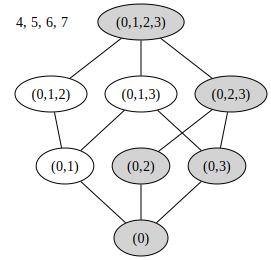

In [45]:
s:=NumericalSemigroup(4,5,6,7);;
JupyterSplashDot(dotm(s));

## Irreducibility

In [15]:
ismeetirreducible:=function(i,is)
    local  nis, j,k, isi;
    isi:=Filtered(Difference(is,[i]),j->leadd(i,j,is));
    nis:=Length(isi);
    for j in [1..nis] do
        for k in [j+1..nis] do
            if meet([isi[j],isi[k]],is)=i then
                Info(InfoNumSgps,2,MinimalGenerators(i)," is not meet irreducible for ", MinimalGenerators(is[j]), " and ", MinimalGenerators(is[k]));
                return false;
            fi;
        od;
    od;
    return true;
end;


function( i, is ) ... end

In [16]:
isjoinirreducible:=function(i,is)
    local  nis, j,k, isi;
    isi:=Filtered(Difference(is,[i]),j->leadd(j,i,is));
    nis:=Length(isi);
    for j in [1..nis] do
        for k in [j+1..nis] do
            if join([isi[j],isi[k]],is)=i then
                Info(InfoNumSgps,2,MinimalGenerators(i)," is not join irreducible for ", MinimalGenerators(is[j]),  " and ", MinimalGenerators(is[k]));
                return false;
            fi;
        od;
    od;
    return true;
end;


function( i, is ) ... end

In [17]:
isintersectionirreducible:=function(i,is)
    local  nis, j,k, isi;
    isi:=Filtered(Difference(is,[i]),j->IsSubset(j,i));
    nis:=Length(isi);
    for j in [1..nis] do
        for k in [j+1..nis] do
            if Intersection([isi[j],isi[k]])=i then
                Info(InfoNumSgps,2,MinimalGenerators(i)," is not intersection irreducible for ", MinimalGenerators(is[j]), " and ", MinimalGenerators(is[k]));
                return false;
            fi;
        od;
    od;
    return true;
end;


function( i, is ) ... end

In [19]:
isunionirreducible:=function(i,is)
    local  nis, j,k, isi;
    isi:=Filtered(Difference(is,[i]),j->IsSubset(i,j));
    nis:=Length(isi);
    for j in [1..nis] do
        for k in [j+1..nis] do
            if Union([isi[j],isi[k]])=i then
                Info(InfoNumSgps,2,MinimalGenerators(i)," is not union irreducible for ", MinimalGenerators(is[j]), " and ", MinimalGenerators(is[k]));
                return false;
            fi;
        od;
    od;
    return true;
end;


function( i, is ) ... end

In [20]:
irredsI0:=function(s)
    local is, isnz;
    is:=I0(s);;
    isnz:=Difference(is,[0+s]);;
    return Filtered(isnz,i->Filtered(Cartesian(isnz,isnz), p->i<>p[1] and i<>p[2] and i=p[1]+p[2])=[]);
end;

function( s ) ... end

Let $S=\langle 4,7,9\rangle$. The ideal $I=\{0,1,2\}+S=(\{0,1\}+S)+(\{0,1\}+S)$, and so it is not $+$-irreducible.

In [24]:
s:=NumericalSemigroup(4,7,9);;
i:=[0,1,2]+s;;
j:=[0,1]+s;;
i=j+j;

true

However $I$ is $\vee$-irreducible.

In [26]:
is:=I0(s);;
isjoinirreducible(i,is);

true

Now, let $S=\langle 3,7\rangle$. Then, $I=\{0,4,8\}+S$ is $\wedge$-irreducible, but it is not $\cap$-irreducible.

In [30]:
s:=NumericalSemigroup(3,7);;
is:=I0(s);;
i:=[0,4,8]+s;;
ismeetirreducible(i,is);

true

In [32]:
SetInfoLevel(InfoNumSgps,2);;
isintersectionirreducible(i,is);

#I  [ 0, 4, 8 ] is not intersection irreducible for [ 0, 1 ] and [ 0, 2, 4 ]


false

Which is telling us that $I=(\{0,1\}+S)\cap (\{0,2,4\}+S)$.